# Clustering the 'fuji' data set

The 'fuji' data set is actually all the images of size 3264x2448 in the Dresden image database.
The number of images in this dataset is 1918.

We have already extracted the noise patterns and computed the similarity scores between all the images. We have also computed the coordinates with LargeVis. So now we are looking for a way to cluster the images and evaluate. 

In [60]:
%matplotlib inline

import numpy
numpy.set_printoptions(threshold=numpy.inf)
import matplotlib.pyplot as pyplot

In [62]:
#all files associated with this notebook. The matrix_file can be ignored due to its size and it serves for making the plot only
filelist_file = "../data/fuji/filelist.txt"
largevis_file = "../data/embedded/coordinates_files/coordinates2D_fuji_pce.txt"
output_json_file = "../data/combined/fuji-pce.json"

Now let's start by loading the data set, which is consists of two files. A simple text file with all the filenames, that also encode the ground truth. And secondly and a file that contains the already computed similarity scores between all the files.

In [63]:
filelist = [str(s) for s in numpy.loadtxt(filelist_file, dtype=numpy.string_)]
nfiles = len(filelist)

Now we are going to obtain the ground truth, which is encoded in the filenames. 

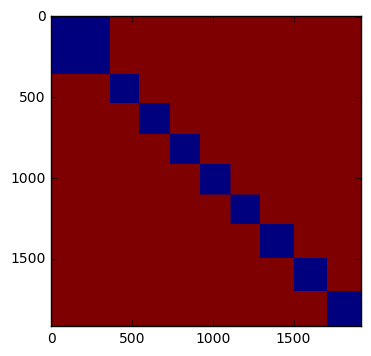

In [65]:
camlist = ["_".join(f.split("_")[:-1]) for f in filelist]

import itertools
ground_truth = list(itertools.product(camlist,camlist))
ground_truth = numpy.array([0 if l[0]==l[1] else 1000 for l in ground_truth]).reshape(nfiles,nfiles)

pyplot.imshow(ground_truth, vmin=0, vmax=80)

Next we want to obtain a list of cluster labels for our ground truth.

In [66]:
cameras = dict.fromkeys(camlist)
camera_index = -1
for camera in cameras:
    camera_index = camera_index + 1
    cameras[camera] = camera_index
ground_truth_labels = numpy.array([cameras[i] for i in camlist])
print(ground_truth_labels)

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

## Clustering on embedded data

In [ ]:
#read output from LargeVis for this data set. If you get an error ' no module named LargeVis', this means you haven't installed it. 
#However, you can circumvent LargeVis if you have already computed the coordinates (if you have largevis_file)
#Just comment or remove the line 'import LargeVis' from ./clustit/embedding.py
from clustit.output import OutputCollection
oc = OutputCollection(largevis_file=largevis_file)

From the visualization of the Fuji dataset we can spot 22 clusters; however, we set the number of clusters to 27 for k-means. This is because we want all visual clusters to be also clusters from the output of k-means. If there are more clusters coming out of k-means than from the visualization, we can easily merge those clusters. 

In [119]:
from clustit.algorithms import kmeans
labels_embedded_kmeans = kmeans(embedded_space=oc, n_clusters=27)
print(labels_embedded_kmeans)

[13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13  1 13 13 13  1 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13  1  1 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 22 13 13 13 13 13 13 25 25 25 25 25 13 13 13
 13 13 13 13 13 25 25 25 25 13 13 22 13 13 13 13 13 13 13 13 13 22 13 13 13
 22 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 22 22 13 13 13 13 13 13  1  1  1  1 13 13 13 13 22 22 13 13 13 13 13
 13 13 13 13 13 13 22 13 13 13 25 13 13 13 22 13 13 13 22 13 13 13 13 13 13
 13 22 13 13 13 13 13 13 13 13 25 13 25 13 22 25 13 13 13 22 13 25 13 13 22
 25 25 13 13 13 22 25 25 25 21 21 21 25  1 25 25 25 22  1 22 25  1 25 22 21
 13  1 21 21  1 13 21 21 22 25  1 21 25 25 25 25 25 22 22 25 25  1  1 22 25
 25 22 22  1  1 21 21 25  1 21 21  1  1 22 25  1  1 21  1  1  1  1 21 22 25
 22 22 22 21  1  1 21 21 21 25  1 22 22 23 25  1 22 25 25 22 22  1 21  1 25
 21 22 23 25

From the visualization we see that we need to merge several clusters

In [125]:
def mergeClusters(list_all_labels, list_merge_labels):
    label = min(list_merge_labels)
    for i in range(0,len(list_all_labels)):
        if list_all_labels[i] in list_merge_labels:
            list_all_labels[i] = label                

In [126]:
mergeClusters(labels_embedded_kmeans, [1, 22, 13, 25, 21])


In [127]:
print(labels_embedded_kmeans)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 23  1  1  1  1  1  1  1  1  1  1  1
  1  1 23  1

## Evaluate clustering  using a set of metrics

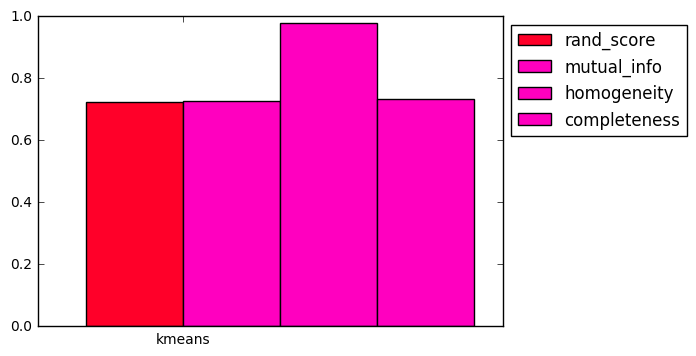

In [128]:
from clustit import metrics
#algorithms = ['complete', 'average', 'centroid', 'dbscan', 'hdbscan', 'spectral', 'affinity', 'kmeans', 'meanshift']
#labels = [labels_complete, labels_average, labels_centroid, labels_dbscan, labels_hdbscan, labels_spectral, labels_affinity, labels_embedded_kmeans, labels_embedded_meanshift]
algorithms = ['kmeans'] 
labels=[labels_embedded_kmeans]
metric = ['rand_score', 'mutual_info', 'homogeneity', 'completeness']
results = {i:[] for i in metric}

for k,v in zip(algorithms, labels):
    results['rand_score'].append(metrics.adjusted_rand_score(ground_truth_labels, v))
    results['mutual_info'].append(metrics.adjusted_mutual_info_score(ground_truth_labels, v))
    results['homogeneity'].append(metrics.homogeneity_score(ground_truth_labels, v))
    results['completeness'].append(metrics.completeness_score(ground_truth_labels, v))
    
def plot_results(algorithms, metric, results):
    """
    Function that creates a bar char for a list of algorithms
    that have been benchmarked using a list of metrics. 
    Results is a dictionary with metrics as keys, values are lists
    that contain one value per algorithm.
    """
    width = 1.0/(len(algorithms)+2)                             #width that leaves bar of whitespace between groups
    x_ind = numpy.arange(len(algorithms)) + 0.5*width           #0.5 width is to make bargroup centered on its tick
    bars = []
    for i in range(len(metric)):
        color = 1.0/len(x_ind)*i                                #map i into [0,1] to get distinct colors
        bars.append(pyplot.bar(x_ind+i*width, results[metric[i]], width=width, color=pyplot.cm.gist_rainbow(color)))
    ax = pyplot.gcf().gca()
    ax.set_xticks(x_ind + (len(x_ind)/float(2)+0.5)*width)      #nicely center the xticks among the bars
    ax.set_xticklabels(algorithms)
    ax.legend(bars, metric, loc='upper left', bbox_to_anchor=(1, 1))
    
plot_results(algorithms, metric, results)


## Produce output

In [129]:
print(results)

{'rand_score': [0.7243685035358309], 'completeness': [0.7324181073117001], 'homogeneity': [0.97951886696294099], 'mutual_info': [0.7280278379310916]}


In [130]:
output_json_file = "../data/combined/fuji-pce27merged.json"

In [132]:
#add the ground truth as a property to the output for comparison
oc.add_property("ground truth", ground_truth_labels)

#add the labelings from the clustering algorithms as properties to the output collection
for n,l in zip(algorithms, labels):
    oc.add_property(n, l)

#generate a JSON file that can directly be imported by DiVE
json_str = oc.to_DiVE(filename=output_json_file)